## Essentials

In [ ]:
import numpy as np
import librosa
from IPython.display import display, Audio
import matplotlib.pyplot as plt

In [ ]:
def compare_audio(audio, augmented_audio, name, sample_rate):
  print("Original Audio")
  display(Audio(audio, rate=sample_rate))
  print(name)
  display(Audio(augmented_audio, rate=sample_rate))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

  ax1.plot(audio)
  ax1.set_title('Original Audio')
  ax1.get_xaxis().set_visible(False)
  ax1.get_yaxis().set_visible(False)

  ax2.plot(augmented_audio)
  ax2.set_title(name)
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

  plt.show()

In [ ]:
def compare_audio_torch(audio, augmented_audio, name, sample_rate1):
  print("Original Audio")
  display(Audio(audio, rate=sample_rate1))
  print(name)
  display(Audio(augmented_audio, rate=sample_rate1))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

  audio = audio.T.numpy()
  augmented_audio = augmented_audio.T.numpy()

  ax1.plot(audio)
  ax1.set_title('Original Audio')
  ax1.get_xaxis().set_visible(False)
  ax1.get_yaxis().set_visible(False)

  ax2.plot(augmented_audio)
  ax2.set_title(name)
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

  plt.show()

## Sample Audio

In [ ]:
audio, sample_rate = librosa.load('/content/Sample Audio.mp3')
start = 1 * sample_rate
end = 7 * sample_rate
audio = audio[start:end]

display(Audio(audio, rate=sample_rate))

## 1) Audiomentations


*   https://github.com/iver56/audiomentations
*   https://iver56.github.io/audiomentations/waveform_transforms/air_absorption/



In [ ]:
!pip install audiomentations --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from audiomentations import PolarityInversion, AddGaussianSNR, AddShortNoises, ApplyImpulseResponse

### AddGaussianSNR

In [ ]:
transform = AddGaussianSNR(
    min_snr_db=5.0,
    max_snr_db=40.0,
    p=1.0
)
addgaussiansnr_audio = transform(audio, sample_rate=sample_rate)

Original Audio


AddGaussianSNR


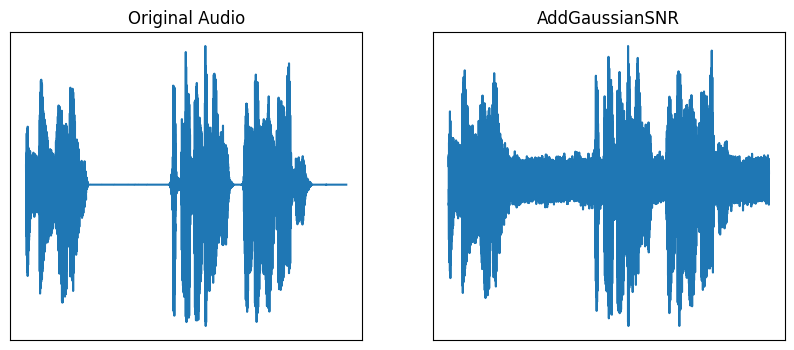

In [ ]:
compare_audio(audio, addgaussiansnr_audio, "AddGaussianSNR", sample_rate)

### AddShortNoises

In [ ]:
transform = AddShortNoises(
    sounds_path="/content/Construction Background Audio.mp3",
    min_snr_in_db=3.0,
    max_snr_in_db=30.0,
    noise_rms="relative_to_whole_input",
    min_time_between_sounds=2.0,
    max_time_between_sounds=8.0,
    noise_transform=PolarityInversion(),
    p=1.0
)

addshortnoises_audio = transform(audio, sample_rate=sample_rate)

/usr/local/lib/python3.10/dist-packages/audiomentations/core/audio_loading_utils.py:37: UserWarning: /content/ytmp3free.cc_construction-site-sound-effect-youtubemp3free.org.mp3 had to be resampled from 48000 Hz to 22050 Hz. This hurt execution time.
  warnings.warn(


Original Audio


AddShortNoises


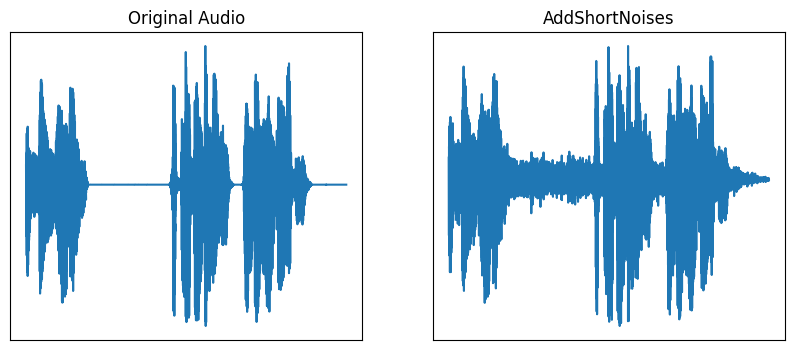

In [ ]:
compare_audio(audio, addshortnoises_audio, "AddShortNoises", sample_rate)

### ApplyImpulseResponse

In [ ]:
transform = ApplyImpulseResponse(ir_path="/content/H058_MtchExp-hndx2-T1198ms.wav", p=1.0) # https://mcdermottlab.mit.edu/Reverb/ReverbDemos.html
applyimpluseresponse_audio = transform(audio, sample_rate=sample_rate)

/usr/local/lib/python3.10/dist-packages/audiomentations/core/audio_loading_utils.py:37: UserWarning: /content/H058_MtchExp-hndx2-T1198ms.wav had to be resampled from 32000 Hz to 22050 Hz. This hurt execution time.
  warnings.warn(


Original Audio


ApplyImpulseResponse


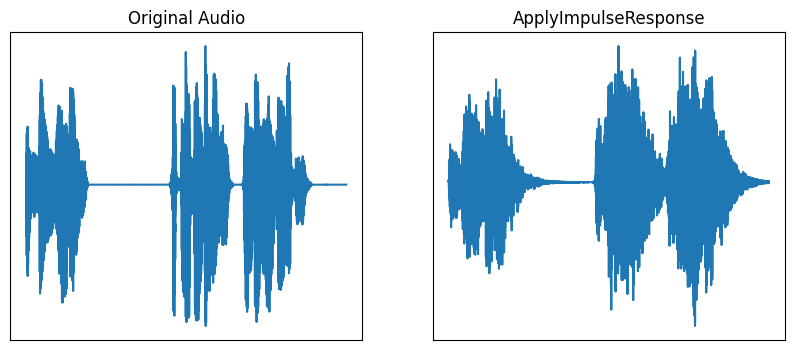

In [ ]:
compare_audio(audio, applyimpluseresponse_audio, "ApplyImpulseResponse", sample_rate)

## 2) Torchaudio



*   https://github.com/pytorch/audio/blob/main/examples/tutorials/audio_data_augmentation_tutorial.py
*   https://pytorch.org/audio/stable/generated/torchaudio.io.AudioEffector.html#torchaudio.io.AudioEffector



In [ ]:
import torchaudio

In [ ]:
waveform, sample_rate1 = torchaudio.load("/content/Sample Audio.mp3", channels_first=False)
start = 1 * sample_rate1
end = 7 * sample_rate1

waveform = waveform[start:end]

### Aecho

In [ ]:
effector = torchaudio.io.AudioEffector(effect="aecho=0.8:0.88:60:0.4")
aecho_waveform = effector.apply(waveform, sample_rate1)

Original Audio


aecho=0.8:0.88:60:0.4


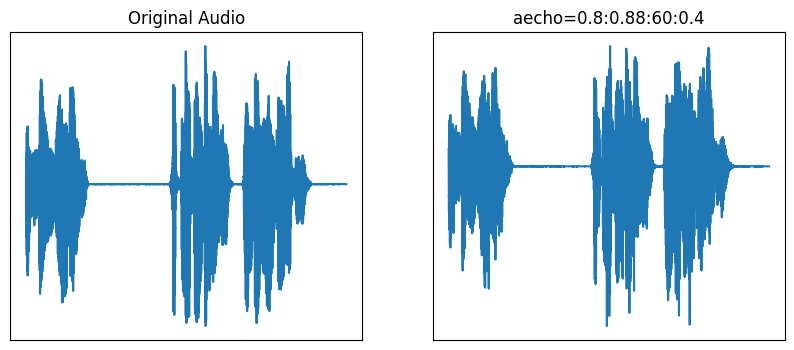

In [ ]:
compare_audio_torch(waveform.T, aecho_waveform.T, "aecho=0.8:0.88:60:0.4", sample_rate1)

### Tremolo

In [ ]:
effector = torchaudio.io.AudioEffector(effect="tremolo")
tremolo_waveform = effector.apply(waveform, sample_rate1)

Original Audio


tremolo


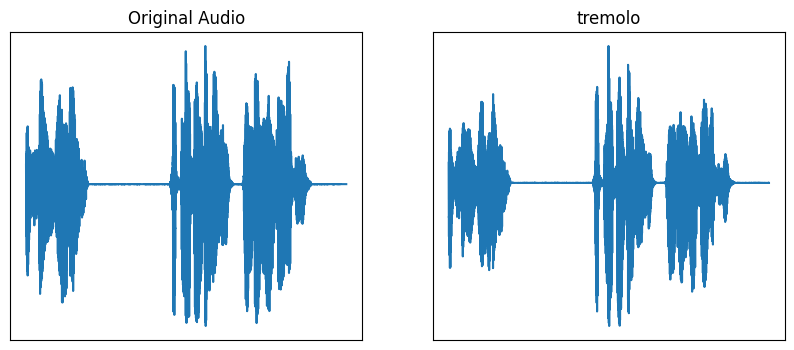

In [ ]:
compare_audio_torch(waveform.T, tremolo_waveform.T, "tremolo", sample_rate1)

## 3) Augly


*   https://github.com/facebookresearch/AugLy/tree/main/augly/audio



In [ ]:
!pip install augly[audio] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.2 MB/s eta 0:00:00


In [ ]:
import augly.audio as audaugs
from augly.audio.utils import validate_and_load_audio

In [ ]:
input_audio_arr, sr = validate_and_load_audio(audio)
sr = int(sr/2)

In [ ]:
meta = []
aug = audaugs.Compose(
    [
        audaugs.AddBackgroundNoise(),
        audaugs.ToMono(),
        audaugs.Clicks(),
    ]
)

aug_audio, sr = aug(input_audio_arr, sample_rate=sr, metadata=meta)

print(meta)

[{'name': 'add_background_noise', 'src_duration': 6.0, 'dst_duration': 6.0, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 22050, 'dst_sample_rate': 22050, 'src_segments': [{'start': 0.0, 'end': 6.0}], 'dst_segments': [{'start': 0.0, 'end': 6.0}], 'background_audio': None, 'snr_level_db': 10.0, 'output_path': None, 'background_duration': 6.0, 'intensity': 90.9090909090909}, {'name': 'to_mono', 'src_duration': 6.0, 'dst_duration': 6.0, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 22050, 'dst_sample_rate': 22050, 'src_segments': [{'start': 0.0, 'end': 6.0}], 'dst_segments': [{'start': 0.0, 'end': 6.0}], 'output_path': None, 'intensity': 0.0}, {'name': 'clicks', 'src_duration': 6.0, 'dst_duration': 6.0, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 22050, 'dst_sample_rate': 22050, 'src_segments': [{'start': 0.0, 'end': 6.0}], 'dst_segments': [{'start': 0.0, 'end': 6.0}], 'seconds_between_clicks': 0.5, 'output_path': None, 'clicks_du

Original Audio


audaugs


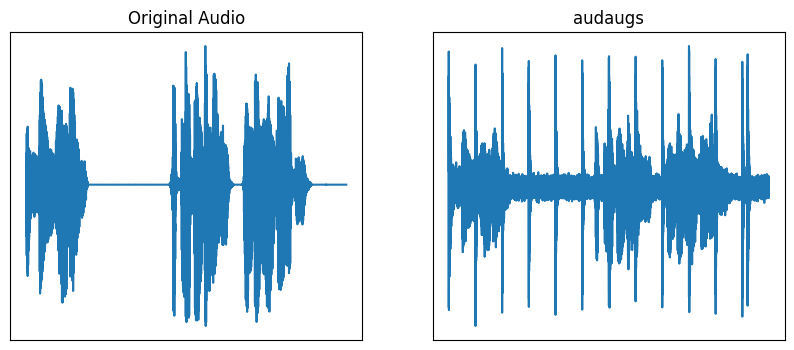

In [ ]:
compare_audio(audio, aug_audio, "audaugs", sr)

## 4) NLPaug



*   https://github.com/makcedward/nlpaug/blob/master/example/audio_augmenter.ipynb




### VTLP

In [ ]:
!pip install numpy requests nlpaug --quiet

In [ ]:
import nlpaug
import nlpaug.augmenter.audio as naa

In [ ]:
aug = naa.VtlpAug(sampling_rate=sample_rate)
augmented_data = aug.augment(audio)[0]

(8.132786e-05, 6.3039624e-05)
Original Audio


VLTP


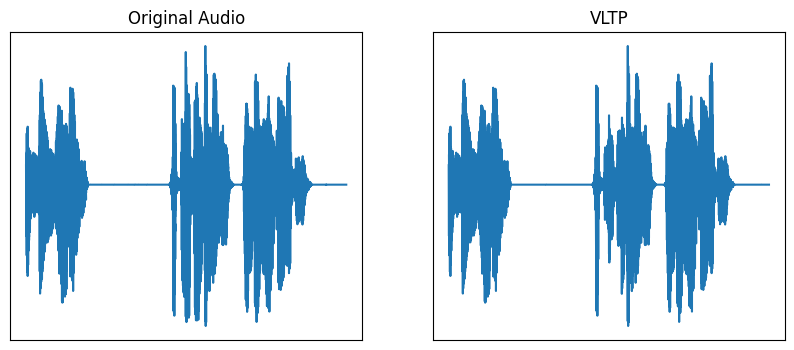

In [ ]:
print((audio.mean(), augmented_data.mean()))
compare_audio(audio, augmented_data, "VLTP", sample_rate)

### PolarityInverseAug

In [ ]:
aug = naa.PolarityInverseAug()
augmented_data = aug.augment(audio)[0]

(8.132786e-05, 8.680798e-05)
Original Audio


PolarityInverseAug


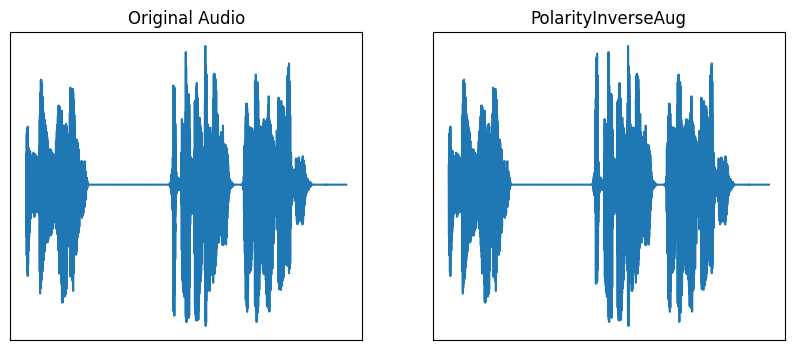

In [ ]:
print((audio.mean(), augmented_data.mean()))
compare_audio(audio, augmented_data, "PolarityInverseAug", sample_rate)